In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import py21cmfast as p21c
import h5py
import powerbox
from scipy import interpolate
from tqdm import tqdm

from dm21cm.config import CONFIG
sys.path.append(CONFIG['DM21cm_dir'])
from analysis.ps import powerspectra

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(CONFIG['DM21cm_dir'] + "/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:59: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:43: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


Default cache dir: /n/netscratch/iaifi_lab/Lab/yitians/dm21cm/21cmFAST-cache


In [ ]:
outputs_dir = CONFIG['lc_outputs_dir']

bkg_fn = f"{outputs_dir}/bkg/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
inj_0_fn = f"{outputs_dir}/active/pwave-phot-250808/log10m5.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"
inj_1_fn = f"{outputs_dir}/active/pbhhr-a0.000-250808/log10m16.500/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"

In [5]:
lc_bkg = p21c.LightCone.read(bkg_fn)
lc_0 = p21c.LightCone.read(inj_0_fn)
lc_1 = p21c.LightCone.read(inj_1_fn)

In [ ]:
outputs_dir = CONFIG['lc_outputs_dir'] + "/active"
run_name_d = {
    'pbhhr' : "pbhhr-a0.000-250808",
    "pbhacc" : "pbhacc-PRc23-250808",
    'pwave' : "pwave-phot-250808",
}
log10m_d = {
    'pbhhr' : 16.5,
    'pbhacc' : 4.,
    'pwave' : 5.,
}
dirs = {k: f"/{rn}/log10m{log10m_d[k]:.3f}" for k, rn in run_name_d.items()}

multiplier_d = {}
for k, rn in run_name_d.items():
    m_s, _, sigma_s, limit_s = get_limits(rn)
    m = 10**log10m_d[k]
    i = np.argmin(np.abs(m_s - m))
    multiplier_d[k] = sigma_s[i] * np.sqrt(stats.chi2.ppf(.9, df=1))
    print(rn, sigma_s[i], limit_s[i])

bkg_fn = f"{outputs_dir}/../bkg/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
inj_fn = "LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"

lc_0.brightness_temp = (lc_0.brightness_temp - lc_bkg.brightness_temp) * 520.264 + lc_bkg.brightness_temp
lc_1.brightness_temp = (lc_1.brightness_temp - lc_bkg.brightness_temp) * 29.8782 + lc_bkg.brightness_temp

In [20]:
ps_bkg_s = []
ps_0_s = []
ps_1_s = []
z_start_s = np.linspace(5, 23, 10)

for i, ax in enumerate(tqdm(range(10))):
    z_start = z_start_s[i]
    z_end = z_start + 2

    ps_bkg_s.append(powerspectra(lc_bkg, z_start, z_end, n_psbins=30))
    ps_0_s.append(powerspectra(lc_0, z_start, z_end, n_psbins=30))
    ps_1_s.append(powerspectra(lc_1, z_start, z_end, n_psbins=30))

  0%|          | 0/10 [00:00<?, ?it/s]/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
100%|██████████| 10/10 [03:16<00:00, 19.64s/it]


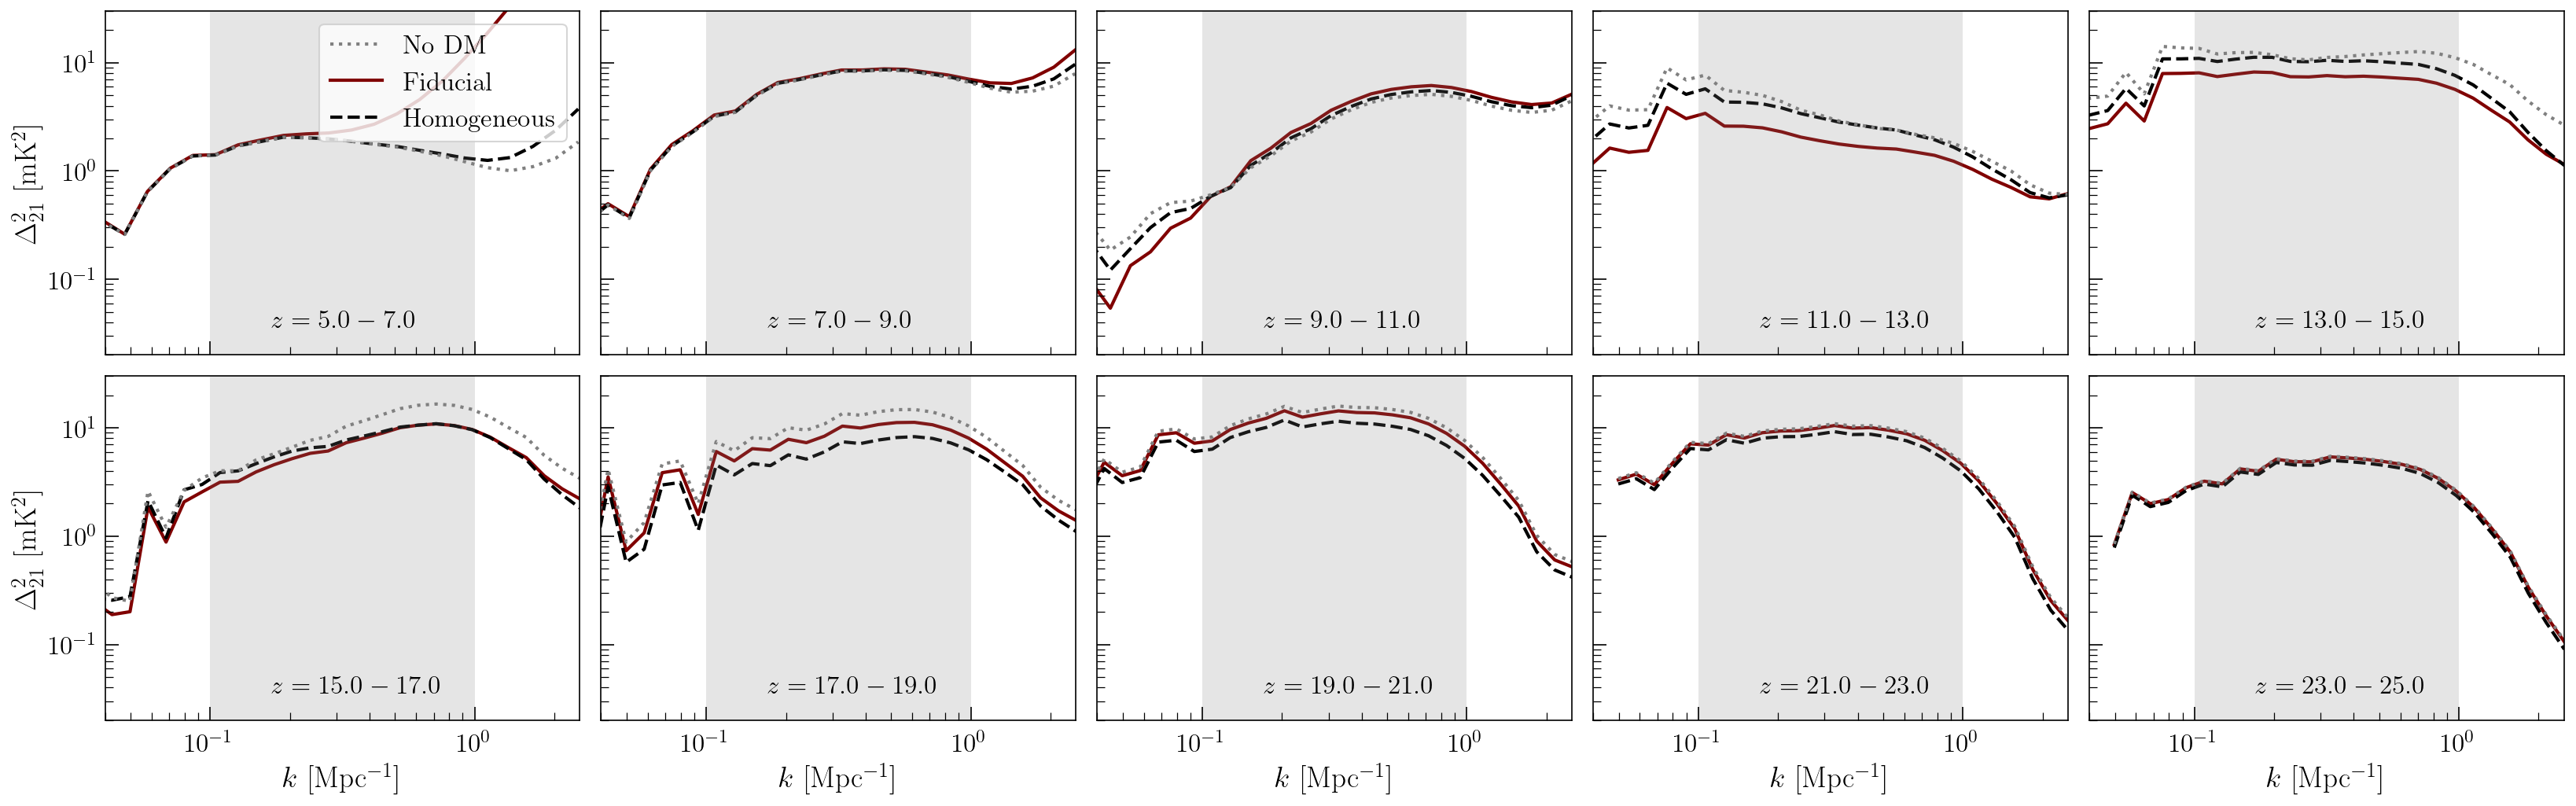

In [ ]:
plt.rcParams['xtick.labelsize'] = 16  # Change x-axis label size
plt.rcParams['ytick.labelsize'] = 16  # Change y-axis label size

fig, axs = plt.subplots(2, 5, figsize=(22, 7), sharex=True, sharey=True)

z_start_s = np.linspace(5, 23, 10)

for i, ax in enumerate(axs.flat):
    z_start = z_start_s[i]
    z_end = z_start + 2

    ps_bkg = ps_bkg_s[i]
    ps_0 = ps_0_s[i]
    ps_1 = ps_1_s[i]

    ax.plot(ps_bkg["k"], ps_bkg["delta"], color="gray", ls=':', label='No DM', lw=2, zorder=2)
    ax.plot(ps_0["k"], ps_0["delta"], color="maroon", label='Fiducial', lw=2, zorder=0)
    ax.plot(ps_1["k"], ps_1["delta"], color="k", ls='--', label='Homogeneous', lw=2, zorder=1)

    ax.axvspan(0.1, 1, color='gray', ec='none', alpha=0.2)

    ax.text(0.35, 0.08, rf"$z={z_start:.1f}-{z_end:.1f}$", transform=ax.transAxes, fontsize=16)
    ax.set(xscale="log", yscale="log", xlim=(0.04, 2.5))
    ax.tick_params(axis='x', which='major', direction='in', length=8, pad=8)
    ax.tick_params(axis='y', which='major', direction='in', length=8, pad=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=5, pad=8)
    ax.tick_params(axis='y', which='minor', direction='in', length=5, pad=4)


for i in range(5, 10):
    axs.flat[i].set_xlabel(r"$k$ [Mpc$^{-1}$]", fontsize=18)
for i in [0, 5]:
    axs.flat[i].set_ylabel(r"$\Delta_{21}^2$ [mK$^2$]", fontsize=18)

axs.flat[0].legend(fontsize=16, loc='upper right')
axs.flat[0].set(ylim=(6e-2, 3e1))

fig.tight_layout()
# fig.savefig(f"plots/ps_small_inj.pdf", bbox_inches='tight')

# Archive

In [ ]:
fig, axs = plt.subplots(4, 5, figsize = (20, 15), sharex = True, sharey = True)

chunk_inds = get_chunk_indices(lc_bkg, 20)
z_s = lc_bkg.lightcone_redshifts

for i, (ps, pss, psl) in enumerate(zip(ps_bkg, ps_small, ps_large)):
    ri, ci = np.unravel_index(i, axs.shape)
    ax = axs[ri, ci]

    ax.plot(ps['k'], ps['delta'], color='k', label='no DM' if i==0 else None)
    ax.plot(pss['k'], pss['delta'], color='b', label=r'$\tau=10^{28}$ s' if i==0 else None)
    ax.plot(psl['k'], psl['delta'], color='r', label=r'$\tau=10^{26}$ s' if i==0 else None)
    ax.set(xscale='log', yscale='log')

    ax.text(.1, .1, f'z={z_s[chunk_inds[i]]:.3f} - {z_s[chunk_inds[i+1]]:.3f}', transform=ax.transAxes, fontsize=18)

axs[0,0].legend()

for j in range(axs.shape[1]):
    axs[-1, j].set_xlabel('k [Mpc$^{-1}$]', fontsize = 22)
for i in range(axs.shape[0]):
    axs[i, 0].set_ylabel('$k^3 P(k)$', fontsize = 22)
    
fig.suptitle(r'$\chi\rightarrow\gamma\gamma, m_\chi=5$keV', fontsize=24)
fig.tight_layout();

In [ ]:
fig, axs = plt.subplots(4, 5, figsize = (20, 15), sharex = True, sharey = True)

chunk_inds = get_chunk_indices(lc_bkg, 20)
z_s = lc_bkg.lightcone_redshifts

for i, (ps, pss, psl) in enumerate(zip(ps_bkg, ps_small, ps_large)):
    ri, ci = np.unravel_index(i, axs.shape)
    ax = axs[ri, ci]
    ax.plot(psl['k'], psl['delta']-ps['delta'], color='r', label=r'$\tau=10^{26}$ s - no DM' if i==0 else None)
    ax.plot(psl['k'], -(psl['delta']-ps['delta']), color='r', ls=':')
    ax.plot(pss['k'], pss['delta']-ps['delta'], color='b', label=r'$\tau=10^{28}$ s - no DM' if i==0 else None)
    ax.plot(pss['k'], -(pss['delta']-ps['delta']), color='b', ls=':')
    ax.text(.1, .1, f'z={z_s[chunk_inds[i]]:.3f} - {z_s[chunk_inds[i+1]]:.3f}', transform=ax.transAxes, fontsize=18)

axs[0, 0].set(xscale='log', yscale='log', ylim=(1e-5, 1e2))
axs[0, 0].legend()

for j in range(axs.shape[1]):
    axs[-1, j].set_xlabel(r'k [Mpc$^{-1}$]', fontsize = 22)
for i in range(axs.shape[0]):
    axs[i, 0].set_ylabel(r'$\Delta k^3 P(k)$', fontsize = 22)
    
fig.suptitle('Difference', fontsize=20)
fig.tight_layout()